In [2]:
'''In my notebook I am using some basic technique of seaborn to 
visualize the type of comments, and for building the model I am using keras LSTM, with 2 epochs I am able to achieve 98% accuracy but
with after increase the epochs we can achieve more.'''
import numpy as np
import pandas as pd

In [3]:
#NLP
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   

In [4]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split



In [5]:
import gc
import time
import warnings


In [6]:
#Vizulization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn


In [7]:
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()


In [8]:
#Load train and test
import os
print(os.getcwd())

C:\Users\Nihal Verma


In [9]:
os.chdir("D:\\Data science\\Datasets\\jigsaw-toxic-comment-classification-challenge")

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
x = train.iloc[: , 2:].sum()

In [13]:
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [14]:
x.sum()

35098

In [15]:
#now take a look on total clean comments
sum1= train.iloc[:,2:].sum(axis=1)

In [16]:
sum1

0         0
1         0
2         0
3         0
4         0
5         0
6         4
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
159541    3
159542    0
159543    0
159544    0
159545    0
159546    2
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    3
159555    0
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [17]:
train['clean'] = (sum1 == 0)

In [18]:
#total clean comments
train['clean'].sum()

143346

In [19]:
#check for missing values
print(train.isnull().sum())
print("-"*23)
print(test.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
-----------------------
id              0
comment_text    0
dtype: int64


In [20]:
train.shape

(159571, 9)

In [21]:
x = train.iloc[:, 2:].sum()

In [22]:
#index of x look like
x.index

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'clean'],
      dtype='object')

In [23]:
#values of x looks like
x.values

array([ 15294.,   1595.,   8449.,    478.,   7877.,   1405., 143346.])

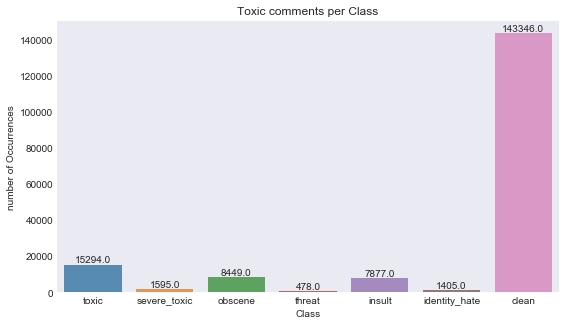

In [24]:
plt.figure(figsize = (9,5))
p = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("Toxic comments per Class")
plt.xlabel("Class")
plt.ylabel("number of Occurrences")
rectangles = p.patches
labels = x.values
for rectangle, label in zip(rectangles, labels):
    height = rectangle.get_height()
    p.text(rectangle.get_x() + rectangle.get_width()/2, height+ 5 , label, ha = 'center', va= 'bottom')
    

In [25]:
sum1.value_counts().index

Int64Index([0, 1, 3, 2, 4, 5, 6], dtype='int64')

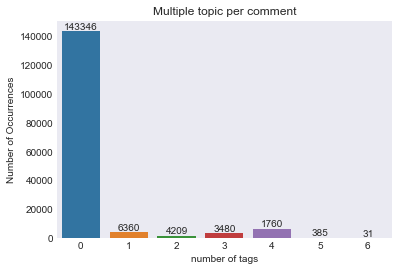

In [26]:
T =sns.barplot(sum1.unique() , sum1.value_counts())
plt.title("Multiple topic per comment")
plt.xlabel("number of tags")
plt.ylabel("Number of Occurrences")
rectangles = T.patches
labels =  sum1.value_counts().values
for rectangle , label in zip(rectangles , labels):
    height = rectangle.get_height()
    T.text(rectangle.get_x() + rectangle.get_width()/2 , height + 5, label , ha = 'center', va = 'bottom')

In [27]:
#Now we are going to look types of comments
print("******************severe_toxic comments look like:******************")
print("\n")
print(train[train.severe_toxic == 1].iloc[3,1])
print("-"*65)
print("******************Toxic comments looks like :******************")
print("\n")
print(train[train.toxic == 1].iloc[6,1])
print("-"*65)
print("******************Obscene comments looks like :******************")
print("\n")
print(train[train.obscene == 1].iloc[2,1])
print("-"*65)
print("******************Threat comments looks like ******************")
print("\n")
print(train[train.threat == 1].iloc[0,1])
print("-"*65)
print("******************Insult comments looks like ******************")
print("\n")
print(train[train.insult == 1].iloc[4,1])
print("-"*65)
print("******************Identity hate comments looks like ******************")
print("\n")
print(train[train.identity_hate == 1].iloc[0,1])

******************severe_toxic comments look like:******************


Hi 

Im a fucking bitch.

50.180.208.181
-----------------------------------------------------------------
******************Toxic comments looks like :******************


GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!
-----------------------------------------------------------------
******************Obscene comments looks like :******************


FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
-----------------------------------------------------------------
******************Threat comments looks like ******************


Hi! I am back again!
Last warning!
Stop undoing my edits or die!
-----------------------------------------------------------------
******************Insult comments looks like ******************


=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.
----------------------------------------------------------

In [28]:
subset=train[train.clean==True]
text=subset.comment_text.values
wordcloud = WordCloud().generate(" ".join(text))
plt.figure(figsize = (20, 10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)

plt.show()

MemoryError: 

In [ ]:
subset=train[train.toxic==1]
text=subset.comment_text.values
wordcloud = WordCloud().generate(" ".join(text))

plt.figure(figsize = (20, 10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.show()

In [ ]:
subset=train[train.severe_toxic==True]
text=subset.comment_text.values
wordcloud = WordCloud().generate(" ".join(text))

plt.figure(figsize = (20, 10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.show()

In [ ]:
subset=train[train.threat==1]
text=subset.comment_text.values
wordcloud = WordCloud().generate(" ".join(text))
plt.figure(figsize = (20, 10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Threat Comments", fontsize=30)
plt.show()

In [ ]:
subset=train[train.insult==1]
text=subset.comment_text.values
wordcloud = WordCloud().generate(" ".join(text))
plt.figure(figsize = (20, 10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Insult Comments", fontsize=30)
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
comments_train = train["comment_text"]
comments_test = test["comment_text"]

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(comments_train))
list_tokenized_train = tokenizer.texts_to_sequences(comments_train)
list_tokenized_test = tokenizer.texts_to_sequences(comments_test)

In [ ]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

In [ ]:
inp = Input(shape=(maxlen, ))

In [ ]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [ ]:
x = GlobalMaxPool1D()(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(50, activation="relu")(x)

In [ ]:
x = Dropout(0.1)(x)

In [ ]:
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
model.predict('BItch')